<a href="https://colab.research.google.com/github/DeepanshuMonga/AI-ML-Projects/blob/main/App%20Usage%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#import pandas to read csv file
df = pd.read_csv("App Data.csv")

#custom order is a list to sort reason for quitting
custom_order = ["Expensive", "Not Useful", "Unhappy", "Others"]

#Converting reason to categorical data
df['Reason for Quitting'] = pd.Categorical(df['Reason for Quitting'], categories=custom_order, ordered=True)

#Sorting the values by reason for quitting and cost offered in Rupees in ascending order
df.sort_values(by=['Reason for Quitting', 'Cost Offered (rupees)'], ascending=[True, True], inplace=True)

#Saving the entire sorted data into a new CSV file
df.to_csv("sorted_file.csv", index=False)

print(df)


      Duration Used (days)  Total Usage (minutes) Reason for Quitting  \
3                      338                  28135           Expensive   
13                     195                   8003           Expensive   
33                     110                   2286           Expensive   
46                     287                  13273           Expensive   
49                      72                   5176           Expensive   
...                    ...                    ...                 ...   
9763                   269                  18424              Others   
9783                    90                   2129              Others   
9832                   126                   5482              Others   
9944                   104                   7548              Others   
9993                   361                  17812              Others   

      Cost Offered (rupees)  Accepted Offer  
3                       500            True  
13                      500    

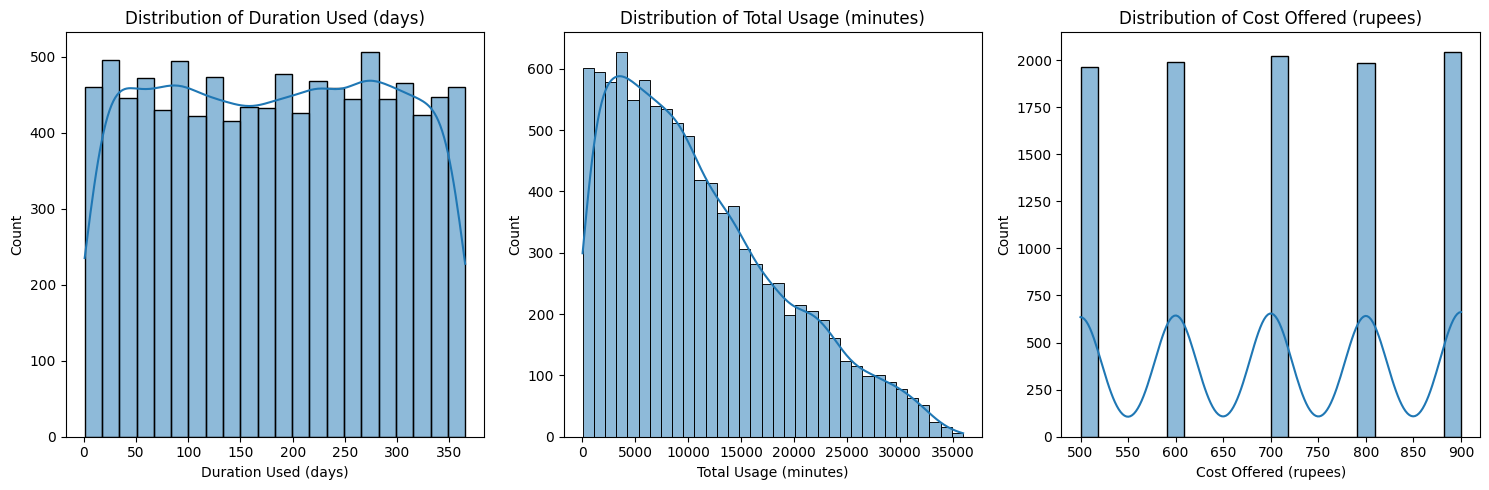

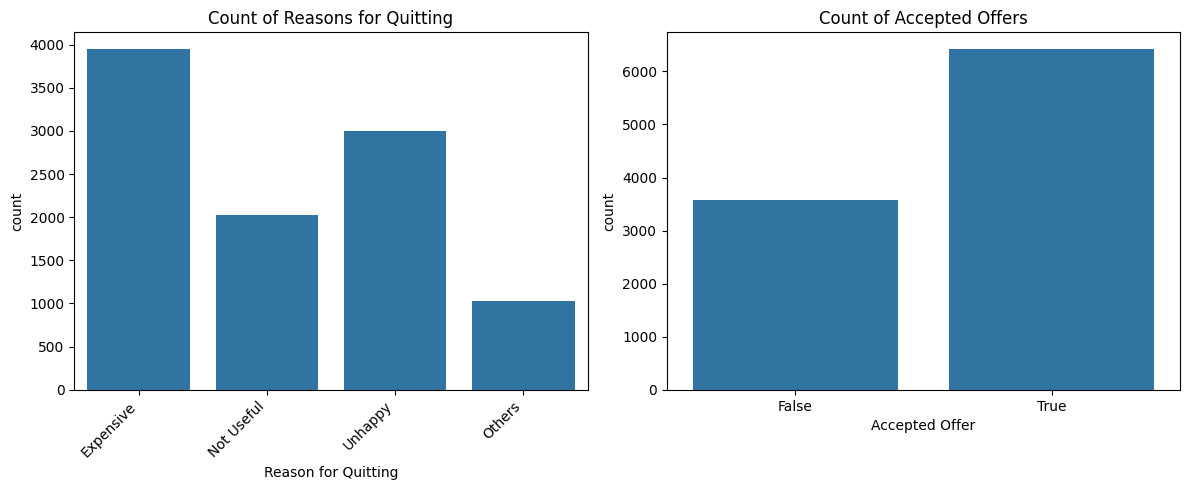

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("sorted_file.csv")
# Numerical features distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Duration Used (days)'], kde=True)
plt.title('Distribution of Duration Used (days)')

plt.subplot(1, 3, 2)
sns.histplot(df['Total Usage (minutes)'], kde=True)
plt.title('Distribution of Total Usage (minutes)')

plt.subplot(1, 3, 3)
sns.histplot(df['Cost Offered (rupees)'], kde=True)
plt.title('Distribution of Cost Offered (rupees)')

plt.tight_layout()
plt.show()

# Categorical features distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Reason for Quitting', data=df)
plt.title('Count of Reasons for Quitting')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.countplot(x='Accepted Offer', data=df)
plt.title('Count of Accepted Offers')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#loading the data set
file_path = "/content/sorted_file_.csv"
df = pd.read_csv(file_path)

# Step 1:Encoding for "Reason for Quitting"
df_encoded = pd.get_dummies(df, columns=["Reason for Quitting"], prefix="Reason")

# Step 2: Feature Engineering - Create "Usage per day" (dividing total usage bby duration used days)
df_encoded["Usage per day"] = df_encoded["Total Usage (minutes)"] / df_encoded["Duration Used (days)"]

# (X) - Exclude target column ("Accepted Offer") aka dropping the column
X = df_encoded.drop(columns=["Accepted Offer"])

# (y) - The column we want to predict
y = df_encoded["Accepted Offer"]

# Step 3: Split Data into Training (80%) & Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 66.95%

Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.35      0.43       717
        True       0.70      0.85      0.77      1283

    accuracy                           0.67      2000
   macro avg       0.63      0.60      0.60      2000
weighted avg       0.65      0.67      0.65      2000

